<a href="https://colab.research.google.com/github/LiliContreras/OPIS_2024/blob/Examen1_OPIS/Examen_P2_LContreras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Desarrollar un programa en Python que permita estimar la magnitud de Richter usando la ecuación:

\begin{equation}
  M_L=log A +2.76*log Δ-2.48
\end{equation}

donde A es la amplitud máxima registrada en un instrumento Wood Anderson y Δ es la distancia en KM. El programa debe tomar las salidas de $M_L$ y que realice lo siguiente:



*   Lea todas las magnitudes $M_L$ calculadas
*   Genera un histograma de magnitudes
*   Desde consola (o de manera interactiva) elimine las $M_L$ que provoquen sesgo en el promedio de la magnitud.
*   Mostrar histograma depurado







In [1]:
!pip install obspy

In [69]:
#Importando modulo obspy
import obspy
#Importar lo de graficos
import matplotlib.pyplot as plt
#Para operaciones :
import numpy as np
import pandas as pd
import sympy as sy
import math

In [3]:
def Maximos(st):
  max_amplitudes = [] # Variable auxiliar

  # Iterar sobre cada traza en el objeto Stream
  for tr in st: #Para cada traza en la variable
    max_amplitude = tr.data.max() #Se obtiene amplitud maxima
    max_amplitudes.append(max_amplitude)

  min_amplitudes = [] # Variable auxiliar

  # Iterar sobre cada traza en el objeto Stream
  for tr in st: #Para cada traza en la variable
    min_amplitude = tr.data.min() #Se obtiene amplitud mínima
    min_amplitudes.append(min_amplitude)

  #Obtener absolutos:
  Max_abs=[]
  for i in range(3):
    if max_amplitudes[i]>abs(min_amplitudes[i]):
      Max_abs.append(max_amplitudes[i])
    else:
      Max_abs.append(abs(min_amplitudes[i]))

  return(Max_abs)

In [4]:
#Calculo de Magnitud Richter

def Richter(maxs,delta):
  ML=math.log(maxs,10)+2.76*math.log(delta,10)-2.48
  print('La amplitud máxima es: ',maxs)
  print('La distancia entre estación y epicentro es: ',delta,'km')
  print('La magnitud de Richter es: ',ML)
  return(ML)

In [100]:
def actualizar_histograma(estaciones, valores):
    plt.bar(estaciones, valores, color='skyblue')
    plt.title('Histograma de magnitudes por estación')
    plt.xlabel('Estaciones')
    plt.ylabel('Magnitud local')
    plt.xticks(rotation=45)
    plt.show()

#Réplica 1

In [71]:
Richter_R1=[]
Estaciones=["HUIG","TGIG","PCIG","TUIG","OXIG","THIG","TOIG"]

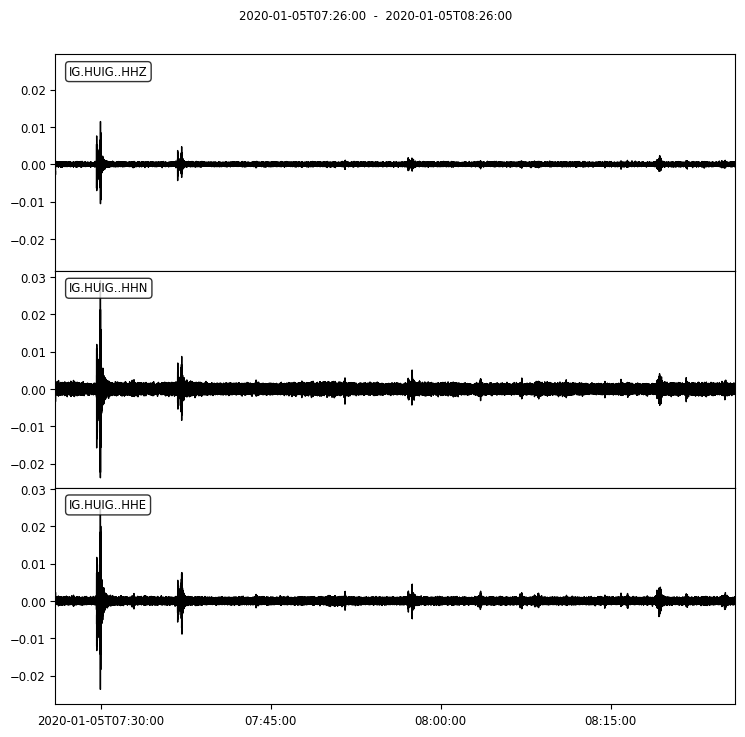

La amplitud máxima es:  0.01145371
La distancia entre estación y epicentro es:  169 km
La magnitud de Richter es:  1.7279134711247832


In [72]:
huig_wa=obspy.read('/content/R1_OPIS_EX/HUIG_HHE_WA.sac') #Se cargan las 3 componentes
huig_wa+=obspy.read('/content/R1_OPIS_EX/HUIG_HHN_WA.sac')
huig_wa+=obspy.read('/content/R1_OPIS_EX/HUIG_HHZ_WA.sac')

#Obtiene máximos:
HUIG_max=Maximos(huig_wa)

#Distancia epicentro estación:
dR1_huig=169

huig_wa.plot()

Richter_R1.append(Richter(HUIG_max[2],dR1_huig))


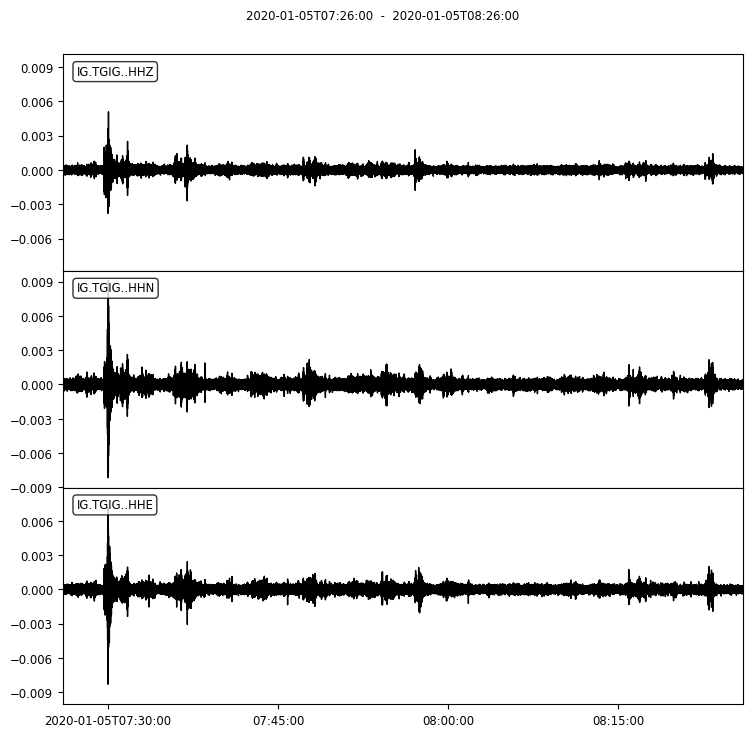

La amplitud máxima es:  0.005083718
La distancia entre estación y epicentro es:  167 km
La magnitud de Richter es:  1.3608789010948725


In [73]:
tgig_wa=obspy.read('/content/R1_OPIS_EX/TGIG_HHE_WA.sac') #Se cargan las 3 componentes
tgig_wa+=obspy.read('/content/R1_OPIS_EX/TGIG_HHN_WA.sac')
tgig_wa+=obspy.read('/content/R1_OPIS_EX/TGIG_HHZ_WA.sac')

#Obtiene máximos:
TGIG_max=Maximos(tgig_wa)

#Distancia epicentro estación:
dR1_tgig=167

tgig_wa.plot()

Richter_R1.append(Richter(TGIG_max[2],dR1_tgig))

In [ ]:
print(Richter_R1)

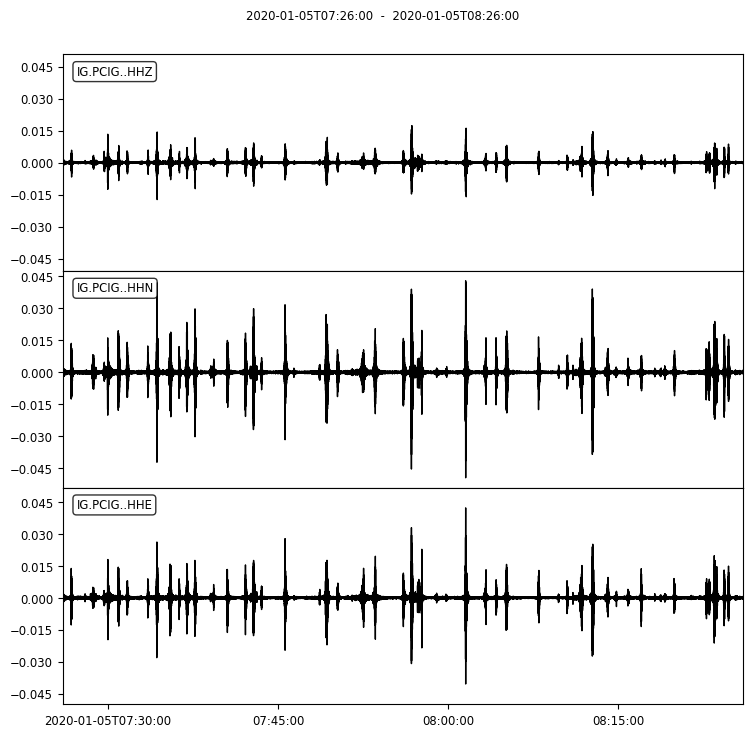

La amplitud máxima es:  0.017350357
La distancia entre estación y epicentro es:  162 km
La magnitud de Richter es:  1.8575698560234186


In [74]:
pcig_wa=obspy.read('/content/R1_OPIS_EX/PCIG_HHE_WA.sac') #Se cargan las 3 componentes
pcig_wa+=obspy.read('/content/R1_OPIS_EX/PCIG_HHN_WA.sac')
pcig_wa+=obspy.read('/content/R1_OPIS_EX/PCIG_HHZ_WA.sac')

#Obtiene máximos:
PCIG_max=Maximos(pcig_wa)

#Distancia epicentro estación:
dR1_pcig=162

pcig_wa.plot()

Richter_R1.append(Richter(PCIG_max[2],dR1_pcig))

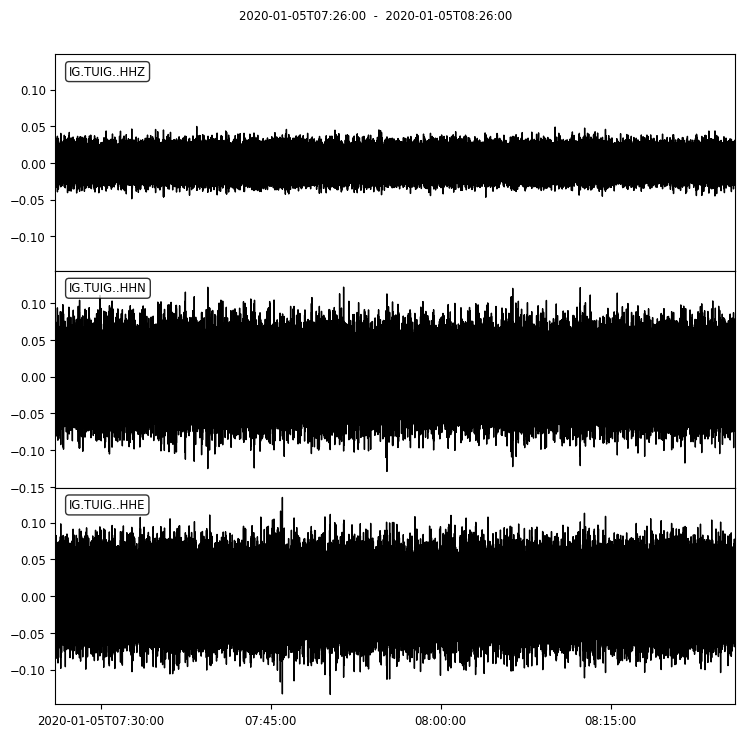

La amplitud máxima es:  0.049707
La distancia entre estación y epicentro es:  196 km
La magnitud de Richter es:  2.543044302726447


In [75]:
tuig_wa=obspy.read('/content/R1_OPIS_EX/TUIG_HHE_WA.sac') #Se cargan las 3 componentes
tuig_wa+=obspy.read('/content/R1_OPIS_EX/TUIG_HHN_WA.sac')
tuig_wa+=obspy.read('/content/R1_OPIS_EX/TUIG_HHZ_WA.sac')

#Obtiene máximos:
TUIG_max=Maximos(tuig_wa)

#Distancia epicentro estación:
dR1_tuig=196

tuig_wa.plot()

Richter_R1.append(Richter(TUIG_max[2],dR1_tuig))

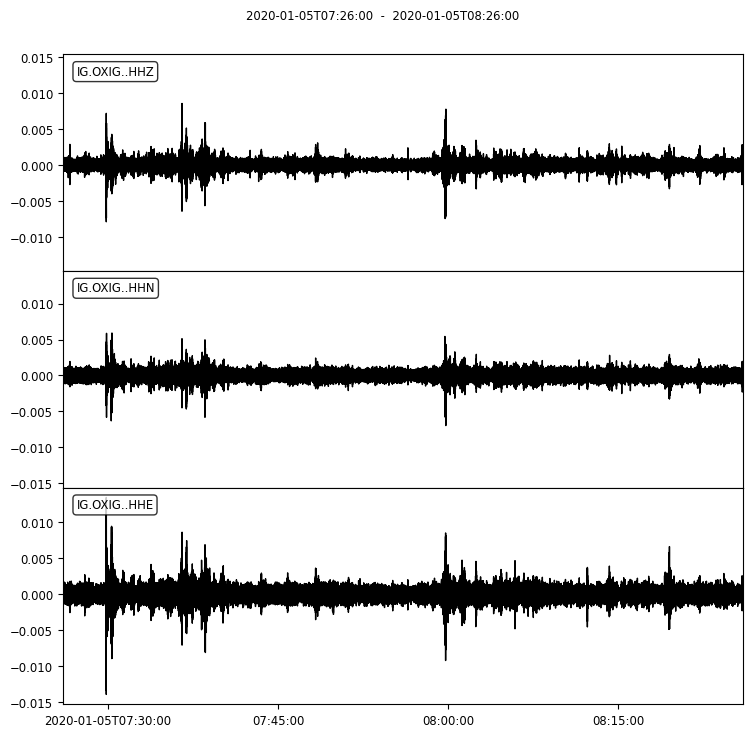

La amplitud máxima es:  0.008543466
La distancia entre estación y epicentro es:  241 km
La magnitud de Richter es:  2.026001144010079


In [76]:
oxig_wa=obspy.read('/content/R1_OPIS_EX/OXIG_HHE_WA.sac') #Se cargan las 3 componentes
oxig_wa+=obspy.read('/content/R1_OPIS_EX/OXIG_HHN_WA.sac')
oxig_wa+=obspy.read('/content/R1_OPIS_EX/OXIG_HHZ_WA.sac')

#Obtiene máximos:
OXIG_max=Maximos(oxig_wa)

#Distancia epicentro estación:
dR1_oxig=241

oxig_wa.plot()

Richter_R1.append(Richter(OXIG_max[2],dR1_oxig))

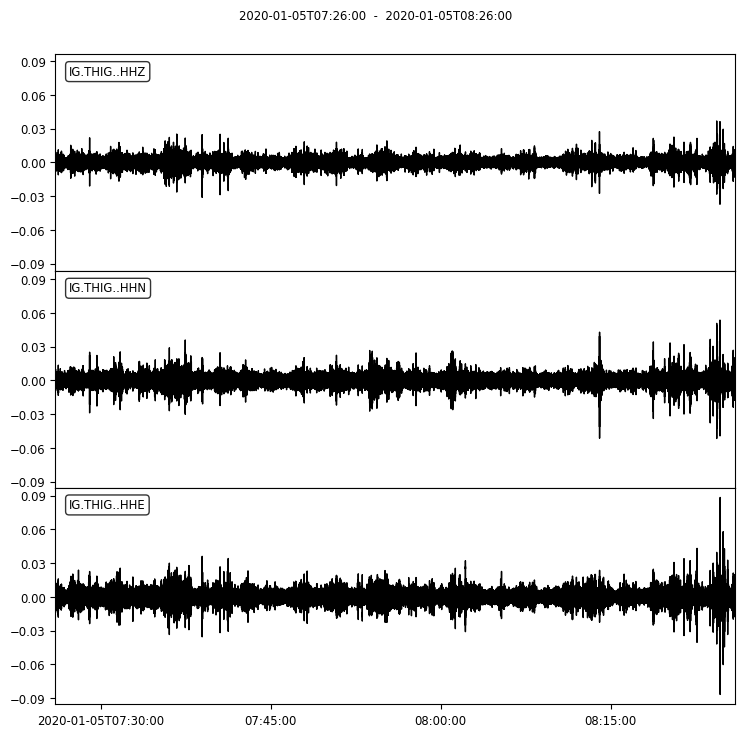

La amplitud máxima es:  0.037257403
La distancia entre estación y epicentro es:  293 km
La magnitud de Richter es:  2.8997672131907852


In [77]:
thig_wa=obspy.read('/content/R1_OPIS_EX/THIG_HHE_WA.sac') #Se cargan las 3 componentes
thig_wa+=obspy.read('/content/R1_OPIS_EX/THIG_HHN_WA.sac')
thig_wa+=obspy.read('/content/R1_OPIS_EX/THIG_HHZ_WA.sac')

#Obtiene máximos:
THIG_max=Maximos(thig_wa)

#Distancia epicentro estación:
dR1_thig=293

thig_wa.plot()

Richter_R1.append(Richter(THIG_max[2],dR1_thig))

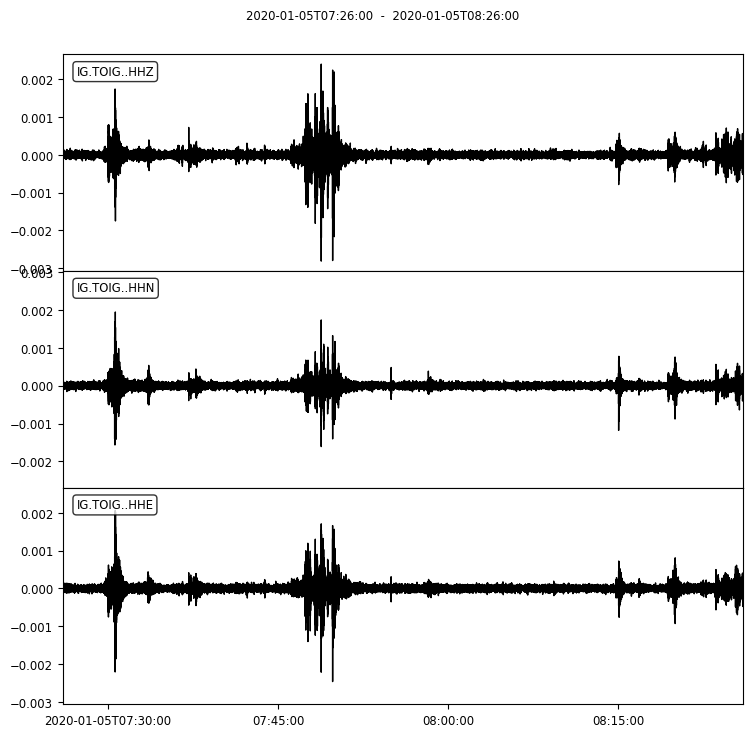

La amplitud máxima es:  0.00281034
La distancia entre estación y epicentro es:  332 km
La magnitud de Richter es:  1.9270999617807942


In [78]:
toig_wa=obspy.read('/content/R1_OPIS_EX/TOIG_HHE_WA.sac') #Se cargan las 3 componentes
toig_wa+=obspy.read('/content/R1_OPIS_EX/TOIG_HHN_WA.sac')
toig_wa+=obspy.read('/content/R1_OPIS_EX/TOIG_HHZ_WA.sac')

#Obtiene máximos:
TOIG_max=Maximos(toig_wa)

#Distancia epicentro estación:
dR1_toig=332

toig_wa.plot()

Richter_R1.append(Richter(TOIG_max[2],dR1_toig))

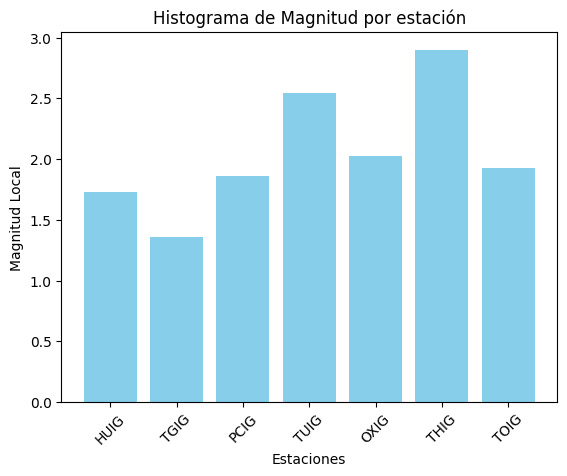

In [79]:
# Crear el histograma
plt.bar(Estaciones, Richter_R1, color='skyblue')

# Personalizar el gráfico
plt.title('Histograma de Magnitud por estación')
plt.xlabel('Estaciones')
plt.ylabel('Magnitud Local')
plt.xticks(rotation=45)  # Rotar los nombres de las estaciones para una mejor visualización

# Mostrar el histograma
plt.show()

¿Quieres eliminar estaciones? (sí/no): si
¿Qué estación quieres eliminar?: THIG


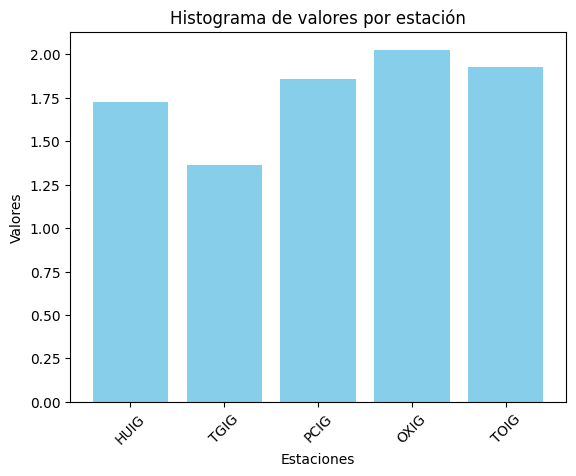

In [99]:
#Estaciones=["HUIG","TGIG","PCIG","TUIG","OXIG","THIG","TOIG"]
Estaciones=["HUIG","TGIG","PCIG","OXIG","THIG","TOIG"]
while True:
    respuesta = input("¿Quieres eliminar estaciones? (sí/no): ")
    if respuesta.lower() == 'sí' or respuesta.lower() == 'si':
        estacion=input('¿Qué estación quieres eliminar?: ')
        if estacion in Estaciones:
          # Eliminar la estación y sus valores correspondientes
          indice = Estaciones.index(estacion)
          del Estaciones[indice]
          del Richter_R1[indice]
          actualizar_histograma(Estaciones, Richter_R1)
        elif respuesta.lower() == 'no':
          print("La estación no se encuentra.")
        break  # Sale del ciclo while
    else:
        print("Respuesta no válida. Por favor, responde 'sí' o 'no'.")

#Réplica 2

In [80]:
Richter_R2=[]
Estaciones=["PCIG","HUIG","TGIG","TUIG","OXIG","THIG","TOIG"]

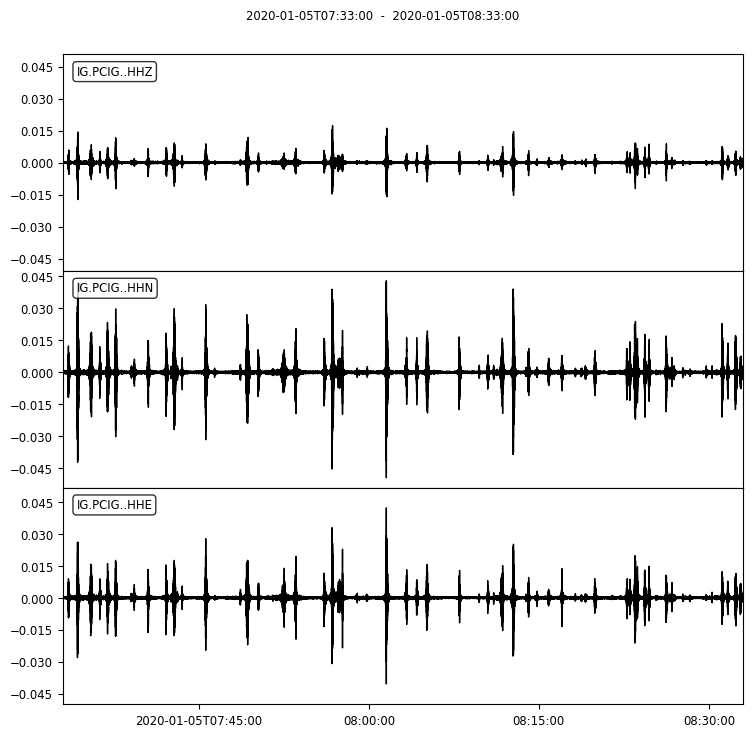

La amplitud máxima es:  0.017350355
La distancia entre estación y epicentro es:  163 km
La magnitud de Richter es:  1.8649461574170556


In [81]:
pcig_wa=obspy.read('/content/R2_OPIS_EX/PCIG_HHE_WA.sac') #Se cargan las 3 componentes
pcig_wa+=obspy.read('/content/R2_OPIS_EX/PCIG_HHN_WA.sac')
pcig_wa+=obspy.read('/content/R2_OPIS_EX/PCIG_HHZ_WA.sac')

#Obtiene máximos:
PCIG_max=Maximos(pcig_wa)

#Distancia epicentro estación:
dR1_pcig=163

pcig_wa.plot()

Richter_R2.append(Richter(PCIG_max[2],dR1_pcig))

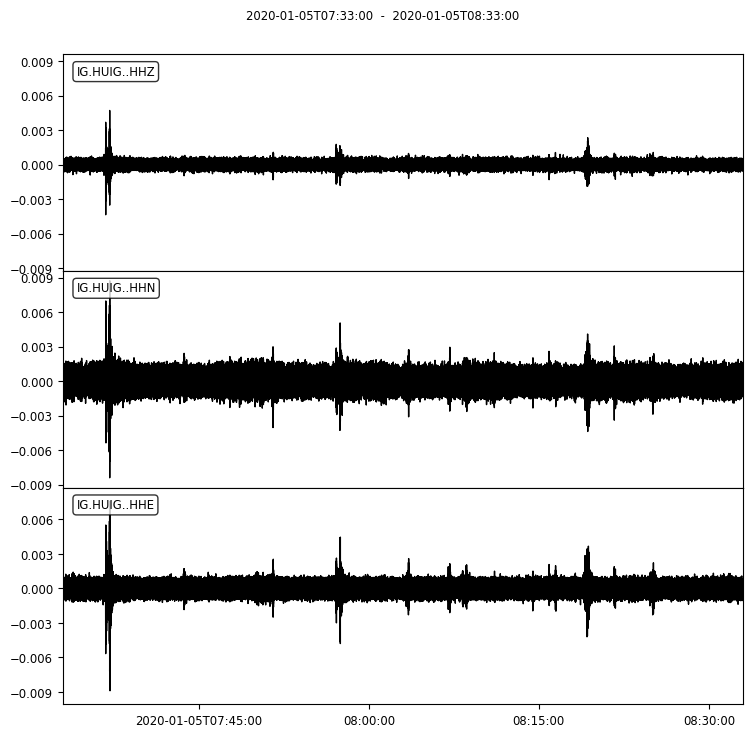

La amplitud máxima es:  0.004707114
La distancia entre estación y epicentro es:  167 km
La magnitud de Richter es:  1.327452162041162


In [82]:
huig_wa=obspy.read('/content/R2_OPIS_EX/HUIG_HHE_WA.sac') #Se cargan las 3 componentes
huig_wa+=obspy.read('/content/R2_OPIS_EX/HUIG_HHN_WA.sac')
huig_wa+=obspy.read('/content/R2_OPIS_EX/HUIG_HHZ_WA.sac')

#Obtiene máximos:
HUIG_max=Maximos(huig_wa)

#Distancia epicentro estación:
dR1_huig=167

huig_wa.plot()

Richter_R2.append(Richter(HUIG_max[2],dR1_huig))

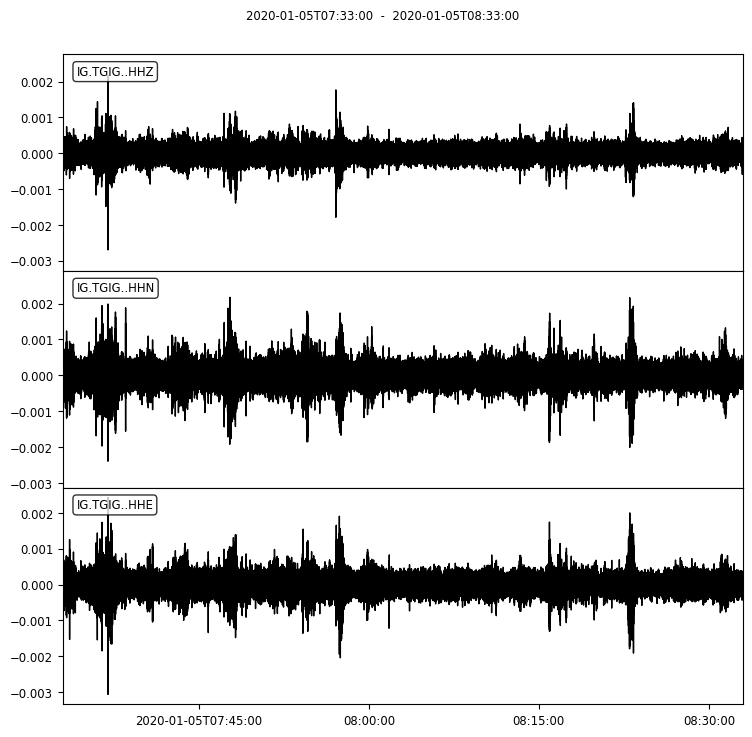

La amplitud máxima es:  0.0026980024
La distancia entre estación y epicentro es:  170 km
La magnitud de Richter es:  1.1070813519471585


In [83]:
tgig_wa=obspy.read('/content/R2_OPIS_EX/TGIG_HHE_WA.sac') #Se cargan las 3 componentes
tgig_wa+=obspy.read('/content/R2_OPIS_EX/TGIG_HHN_WA.sac')
tgig_wa+=obspy.read('/content/R2_OPIS_EX/TGIG_HHZ_WA.sac')

#Obtiene máximos:
TGIG_max=Maximos(tgig_wa)

#Distancia epicentro estación:
dR1_tgig=170

tgig_wa.plot()

Richter_R2.append(Richter(TGIG_max[2],dR1_tgig))

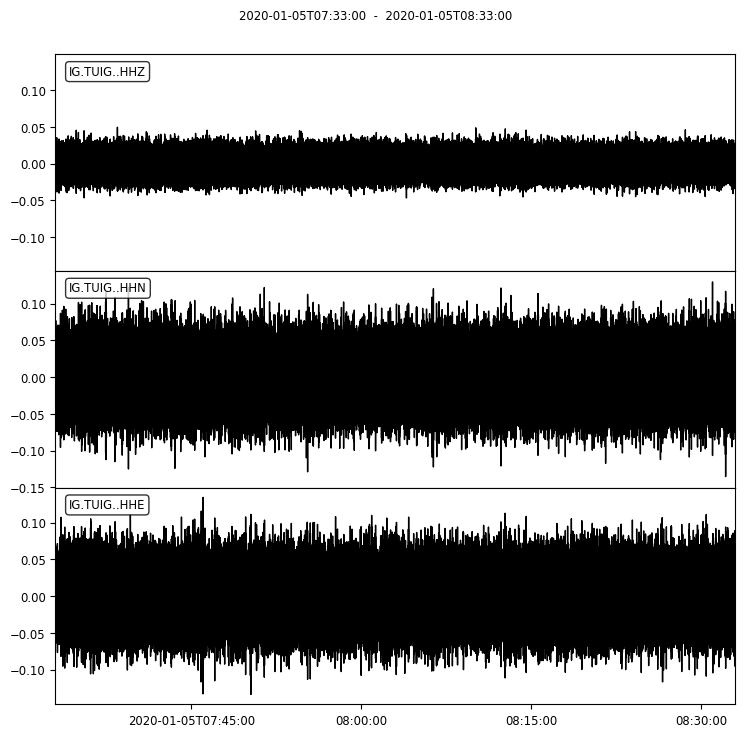

La amplitud máxima es:  0.04970698
La distancia entre estación y epicentro es:  198 km
La magnitud de Richter es:  2.555213308163402


In [84]:
tuig_wa=obspy.read('/content/R2_OPIS_EX/TUIG_HHE_WA.sac') #Se cargan las 3 componentes
tuig_wa+=obspy.read('/content/R2_OPIS_EX/TUIG_HHN_WA.sac')
tuig_wa+=obspy.read('/content/R2_OPIS_EX/TUIG_HHZ_WA.sac')

#Obtiene máximos:
TUIG_max=Maximos(tuig_wa)

#Distancia epicentro estación:
dR1_tuig=198

tuig_wa.plot()

Richter_R2.append(Richter(TUIG_max[2],dR1_tuig))

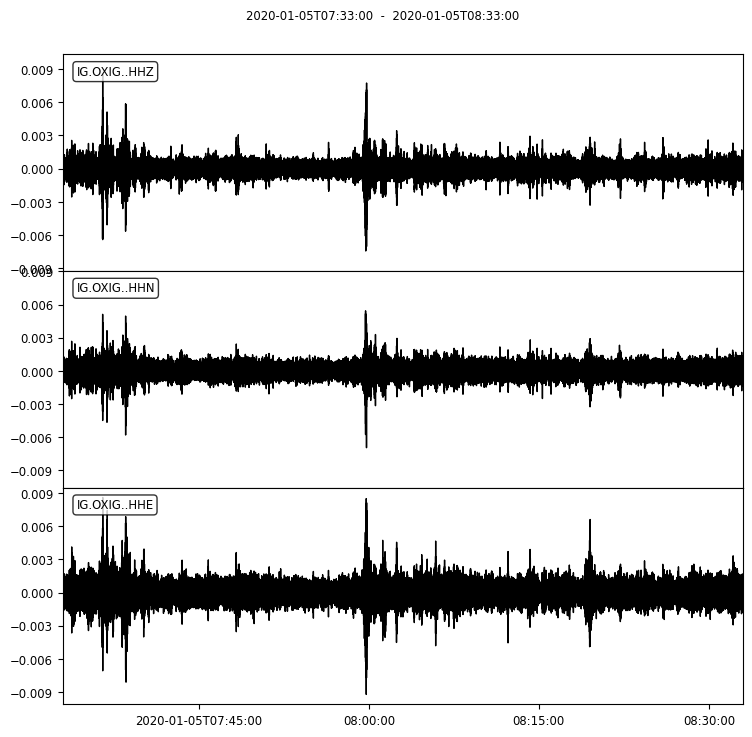

La amplitud máxima es:  0.008543466
La distancia entre estación y epicentro es:  239 km
La magnitud de Richter es:  2.0160123131203034


In [85]:
oxig_wa=obspy.read('/content/R2_OPIS_EX/OXIG_HHE_WA.sac') #Se cargan las 3 componentes
oxig_wa+=obspy.read('/content/R2_OPIS_EX/OXIG_HHN_WA.sac')
oxig_wa+=obspy.read('/content/R2_OPIS_EX/OXIG_HHZ_WA.sac')

#Obtiene máximos:
OXIG_max=Maximos(oxig_wa)

#Distancia epicentro estación:
dR1_oxig=239

oxig_wa.plot()

Richter_R2.append(Richter(OXIG_max[2],dR1_oxig))

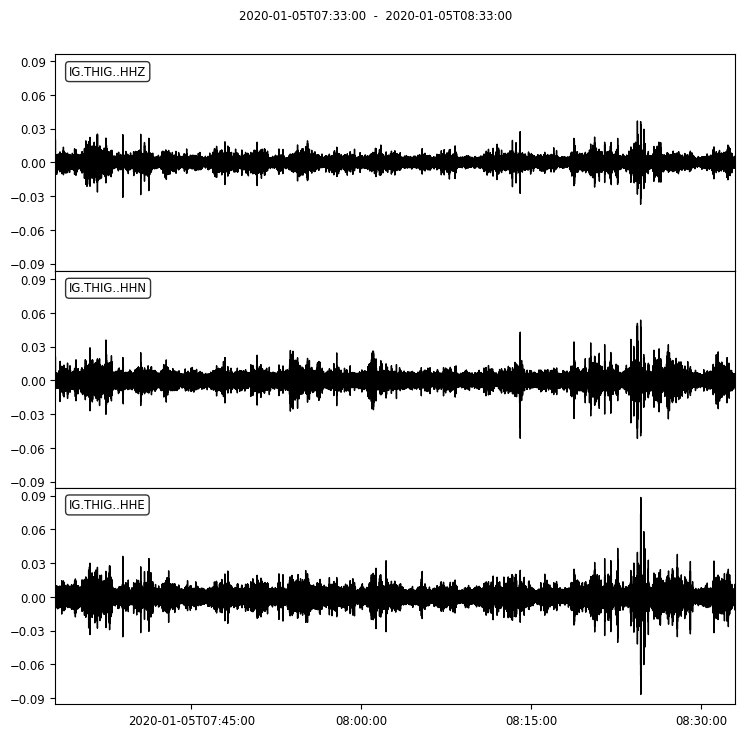

La amplitud máxima es:  0.03725752
La distancia entre estación y epicentro es:  295 km
La magnitud de Richter es:  2.907922691261366


In [86]:
thig_wa=obspy.read('/content/R2_OPIS_EX/THIG_HHE_WA.sac') #Se cargan las 3 componentes
thig_wa+=obspy.read('/content/R2_OPIS_EX/THIG_HHN_WA.sac')
thig_wa+=obspy.read('/content/R2_OPIS_EX/THIG_HHZ_WA.sac')

#Obtiene máximos:
THIG_max=Maximos(thig_wa)

#Distancia epicentro estación:
dR1_thig=295

thig_wa.plot()

Richter_R2.append(Richter(THIG_max[2],dR1_thig))

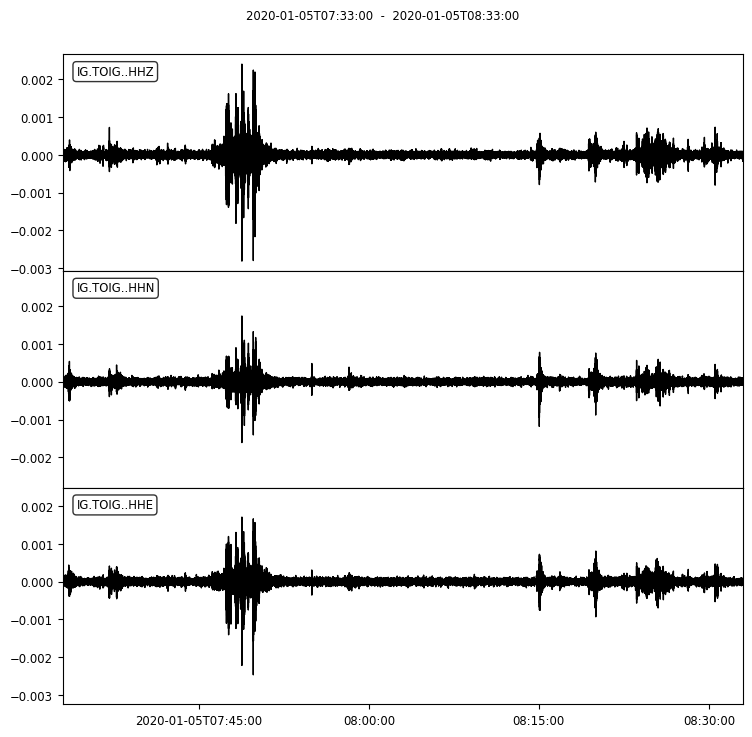

La amplitud máxima es:  0.002810341
La distancia entre estación y epicentro es:  331 km
La magnitud de Richter es:  1.9234842934804406


In [87]:
toig_wa=obspy.read('/content/R2_OPIS_EX/TOIG_HHE_WA.sac') #Se cargan las 3 componentes
toig_wa+=obspy.read('/content/R2_OPIS_EX/TOIG_HHN_WA.sac')
toig_wa+=obspy.read('/content/R2_OPIS_EX/TOIG_HHZ_WA.sac')

#Obtiene máximos:
TOIG_max=Maximos(toig_wa)

#Distancia epicentro estación:
dR1_toig=331

toig_wa.plot()

Richter_R2.append(Richter(TOIG_max[2],dR1_toig))

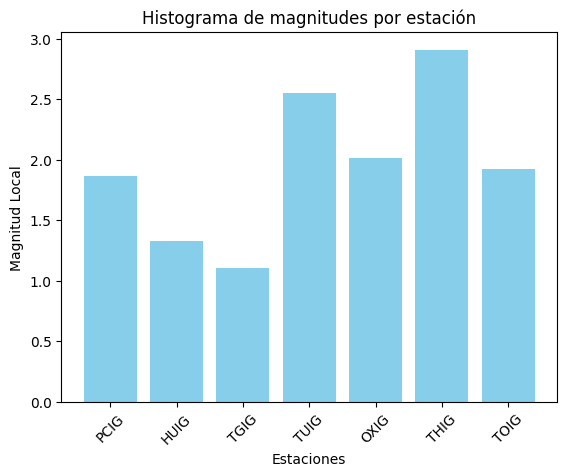

In [88]:
# Crear el histograma
plt.bar(Estaciones, Richter_R2, color='skyblue')

# Personalizar el gráfico
plt.title('Histograma de magnitudes por estación')
plt.xlabel('Estaciones')
plt.ylabel('Magnitud Local')
plt.xticks(rotation=45)  # Rotar los nombres de las estaciones para una mejor visualización

# Mostrar el histograma
plt.show()

¿Quieres eliminar estaciones? (sí/no): si
¿Qué estación quieres eliminar?: THIG


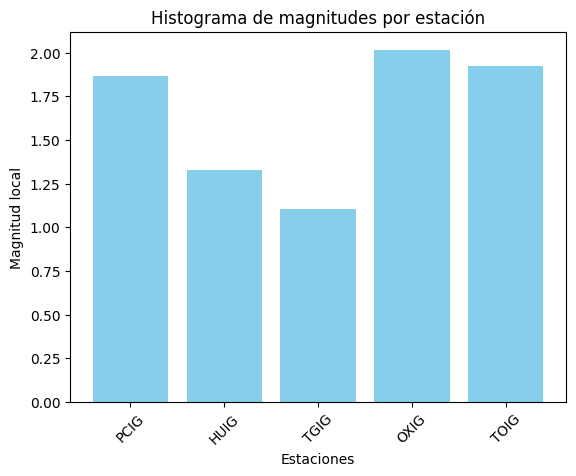

In [102]:
#Estaciones=["PCIG","HUIG","TGIG","TUIG","OXIG","THIG","TOIG"]
Estaciones=["PCIG","HUIG","TGIG","OXIG","THIG","TOIG"]
while True:
    respuesta = input("¿Quieres eliminar estaciones? (sí/no): ")
    if respuesta.lower() == 'sí' or respuesta.lower() == 'si':
        estacion=input('¿Qué estación quieres eliminar?: ')
        if estacion in Estaciones:
          # Eliminar la estación y sus valores correspondientes
          indice = Estaciones.index(estacion)
          del Estaciones[indice]
          del Richter_R2[indice]
          actualizar_histograma(Estaciones, Richter_R2)
        elif respuesta.lower() == 'no':
          print("La estación no se encuentra.")
        break  # Sale del ciclo while
    else:
        print("Respuesta no válida. Por favor, responde 'sí' o 'no'.")

#Réplica 3

In [89]:
Richter_R3=[]
Estaciones=["PCIG","HUIG","TGIG","TUIG","OXIG","THIG","TOIG"]

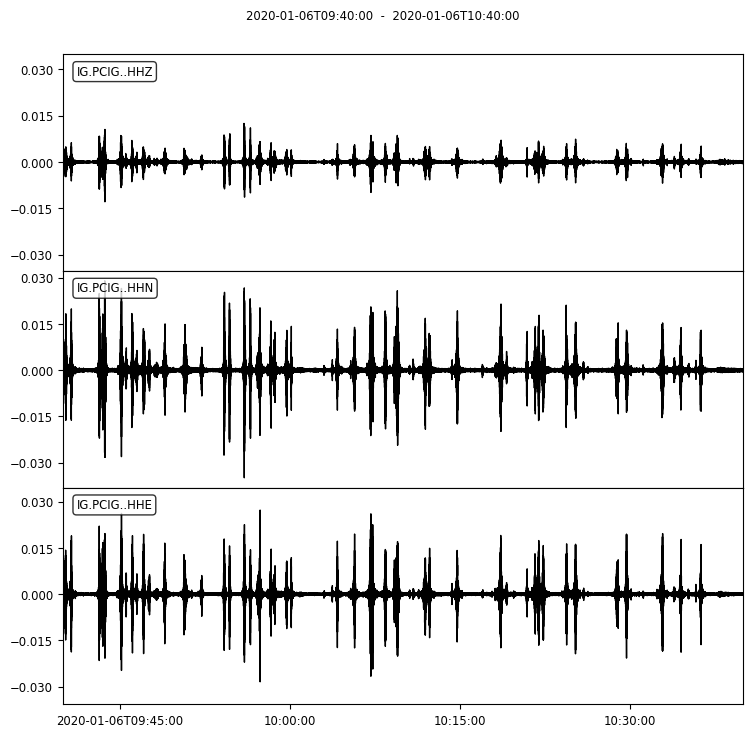

La amplitud máxima es:  0.012892949
La distancia entre estación y epicentro es:  158 km
La magnitud de Richter es:  1.6986458380458793


In [90]:
pcig_wa=obspy.read('/content/R3_OPIS_EX/PCIG_HHE_WA.sac') #Se cargan las 3 componentes
pcig_wa+=obspy.read('/content/R3_OPIS_EX/PCIG_HHN_WA.sac')
pcig_wa+=obspy.read('/content/R3_OPIS_EX/PCIG_HHZ_WA.sac')

#Obtiene máximos:
PCIG_max=Maximos(pcig_wa)

#Distancia epicentro estación:
dR1_pcig=158

pcig_wa.plot()

Richter_R3.append(Richter(PCIG_max[2],dR1_pcig))

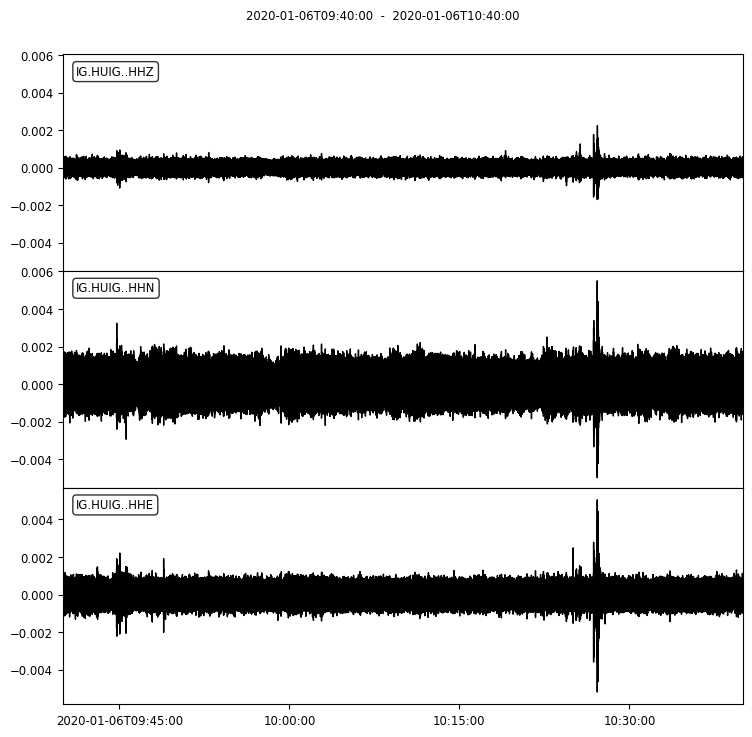

La amplitud máxima es:  0.0022387165
La distancia entre estación y epicentro es:  165 km
La magnitud de Richter es:  0.9902547792945446


In [91]:
huig_wa=obspy.read('/content/R3_OPIS_EX/HUIG_HHE_WA.sac') #Se cargan las 3 componentes
huig_wa+=obspy.read('/content/R3_OPIS_EX/HUIG_HHN_WA.sac')
huig_wa+=obspy.read('/content/R3_OPIS_EX/HUIG_HHZ_WA.sac')

#Obtiene máximos:
HUIG_max=Maximos(huig_wa)

#Distancia epicentro estación:
dR1_huig=165

huig_wa.plot()

Richter_R3.append(Richter(HUIG_max[2],dR1_huig))

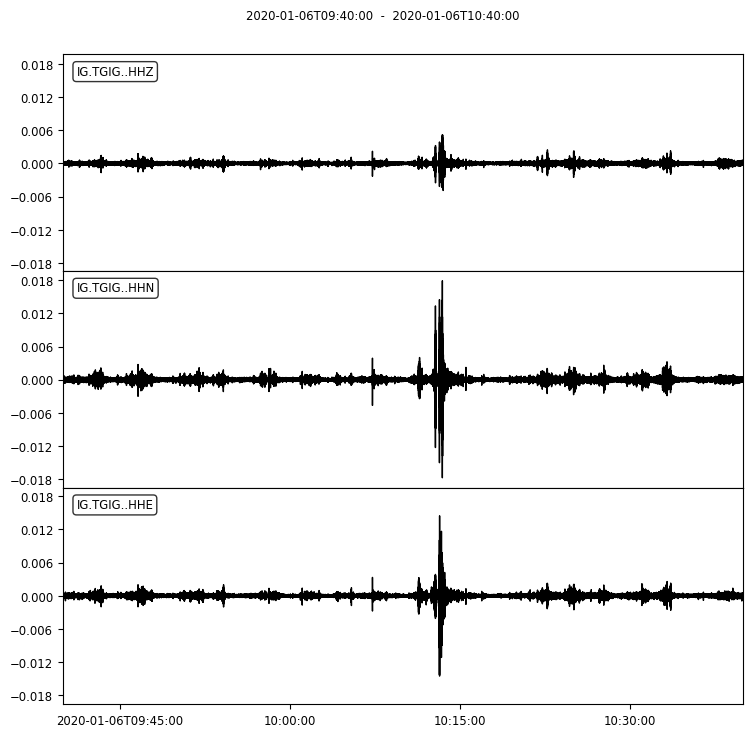

La amplitud máxima es:  0.005180817
La distancia entre estación y epicentro es:  171 km
La magnitud de Richter es:  1.3974675249908923


In [92]:
tgig_wa=obspy.read('/content/R3_OPIS_EX/TGIG_HHE_WA.sac') #Se cargan las 3 componentes
tgig_wa+=obspy.read('/content/R3_OPIS_EX/TGIG_HHN_WA.sac')
tgig_wa+=obspy.read('/content/R3_OPIS_EX/TGIG_HHZ_WA.sac')

#Obtiene máximos:
TGIG_max=Maximos(tgig_wa)

#Distancia epicentro estación:
dR1_tgig=171

tgig_wa.plot()

Richter_R3.append(Richter(TGIG_max[2],dR1_tgig))

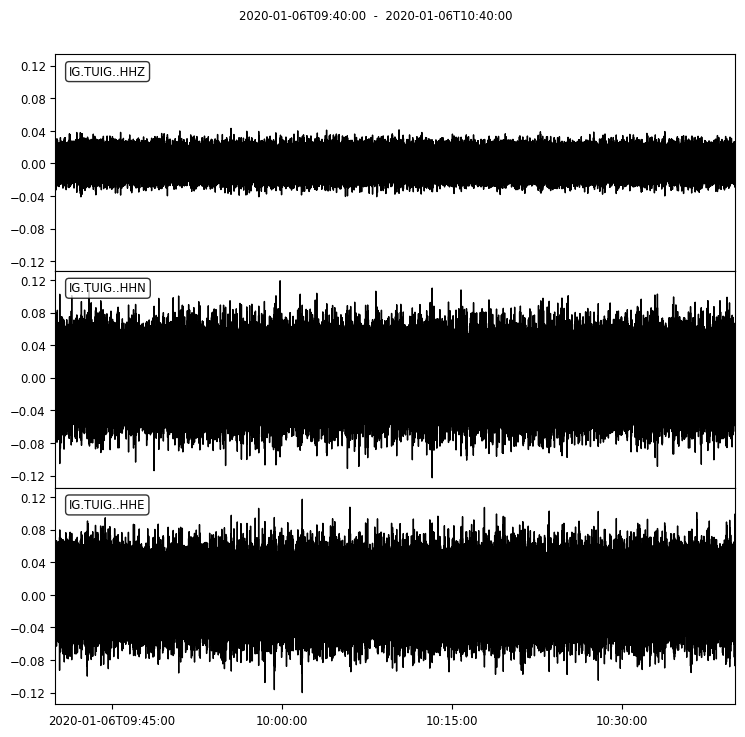

La amplitud máxima es:  0.042995002
La distancia entre estación y epicentro es:  209 km
La magnitud de Richter es:  2.557021724373121


In [93]:
tuig_wa=obspy.read('/content/R3_OPIS_EX/TUIG_HHE_WA.sac') #Se cargan las 3 componentes
tuig_wa+=obspy.read('/content/R3_OPIS_EX/TUIG_HHN_WA.sac')
tuig_wa+=obspy.read('/content/R3_OPIS_EX/TUIG_HHZ_WA.sac')

#Obtiene máximos:
TUIG_max=Maximos(tuig_wa)

#Distancia epicentro estación:
dR1_tuig=209

tuig_wa.plot()

Richter_R3.append(Richter(TUIG_max[2],dR1_tuig))

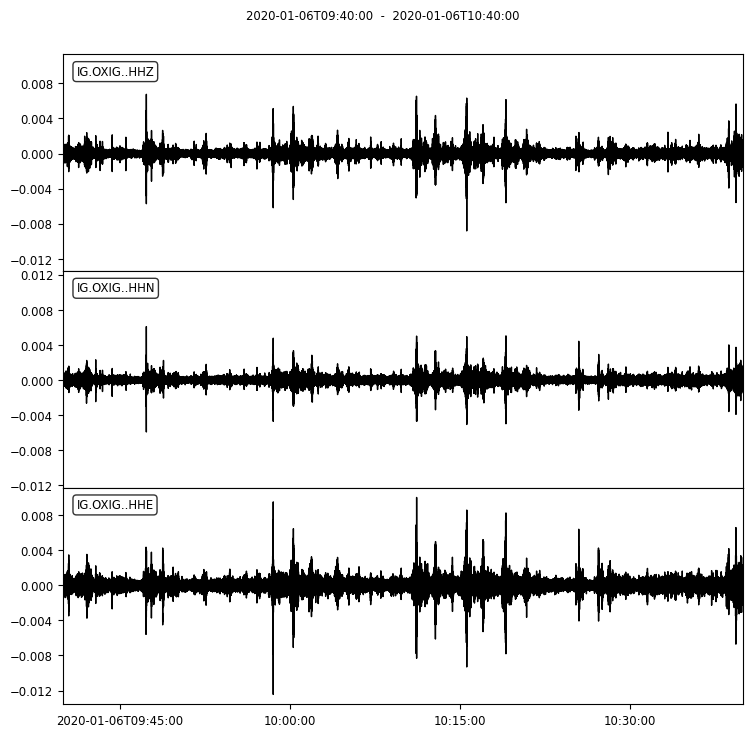

La amplitud máxima es:  0.008812281
La distancia entre estación y epicentro es:  245 km
La magnitud de Richter es:  2.0591867449695855


In [94]:
oxig_wa=obspy.read('/content/R3_OPIS_EX/OXIG_HHE_WA.sac') #Se cargan las 3 componentes
oxig_wa+=obspy.read('/content/R3_OPIS_EX/OXIG_HHN_WA.sac')
oxig_wa+=obspy.read('/content/R3_OPIS_EX/OXIG_HHZ_WA.sac')

#Obtiene máximos:
OXIG_max=Maximos(oxig_wa)

#Distancia epicentro estación:
dR1_oxig=245

oxig_wa.plot()

Richter_R3.append(Richter(OXIG_max[2],dR1_oxig))

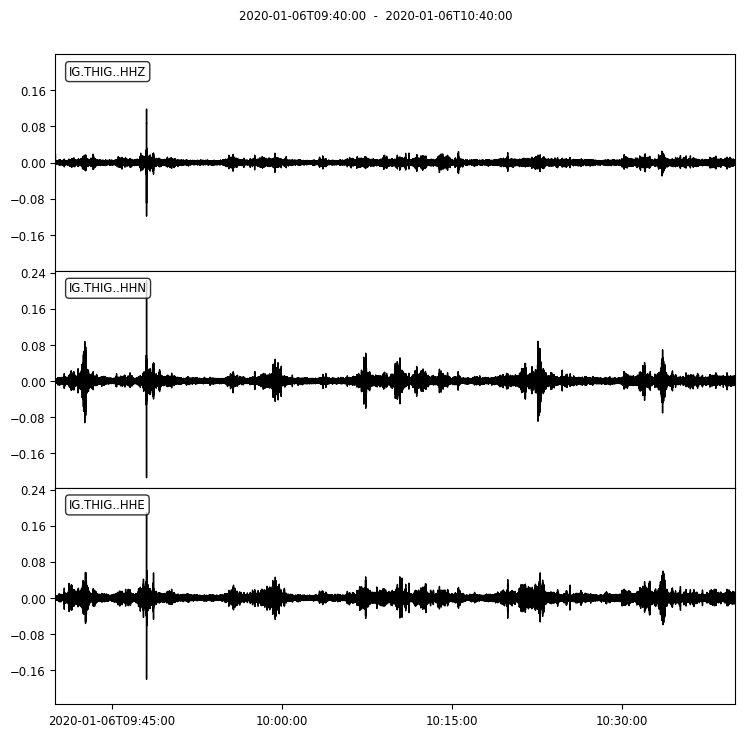

La amplitud máxima es:  0.11861099
La distancia entre estación y epicentro es:  288 km
La magnitud de Richter es:  3.3820482081106413


In [95]:
thig_wa=obspy.read('/content/R3_OPIS_EX/THIG_HHE_WA.sac') #Se cargan las 3 componentes
thig_wa+=obspy.read('/content/R3_OPIS_EX/THIG_HHN_WA.sac')
thig_wa+=obspy.read('/content/R3_OPIS_EX/THIG_HHZ_WA.sac')

#Obtiene máximos:
THIG_max=Maximos(thig_wa)

#Distancia epicentro estación:
dR1_thig=288

thig_wa.plot()

Richter_R3.append(Richter(THIG_max[2],dR1_thig))

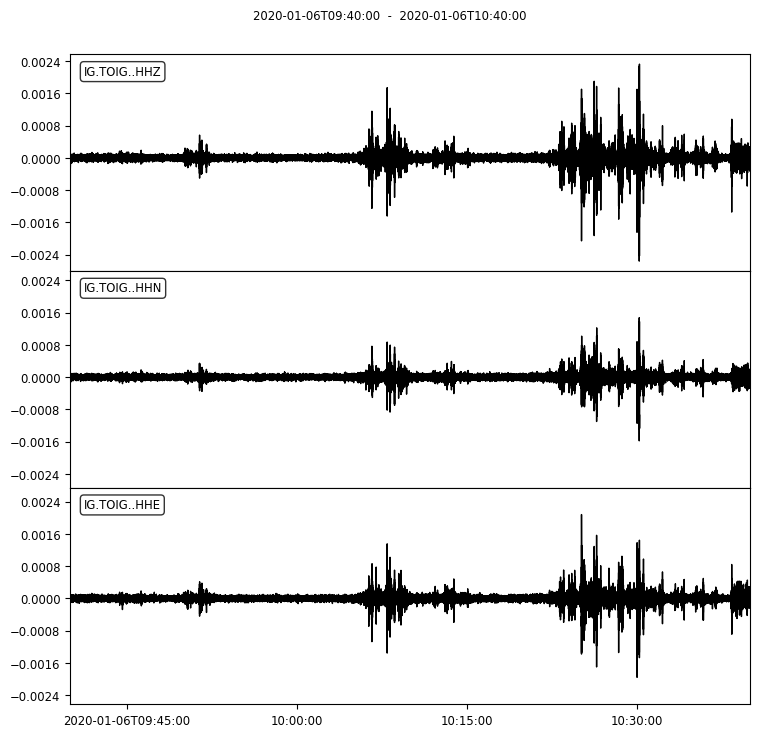

La amplitud máxima es:  0.0025590037
La distancia entre estación y epicentro es:  338 km
La magnitud de Richter es:  1.9078809986139187


In [96]:
toig_wa=obspy.read('/content/R3_OPIS_EX/TOIG_HHE_WA.sac') #Se cargan las 3 componentes
toig_wa+=obspy.read('/content/R3_OPIS_EX/TOIG_HHN_WA.sac')
toig_wa+=obspy.read('/content/R3_OPIS_EX/TOIG_HHZ_WA.sac')

#Obtiene máximos:
TOIG_max=Maximos(toig_wa)

#Distancia epicentro estación:
dR1_toig=338

toig_wa.plot()

Richter_R3.append(Richter(TOIG_max[2],dR1_toig))

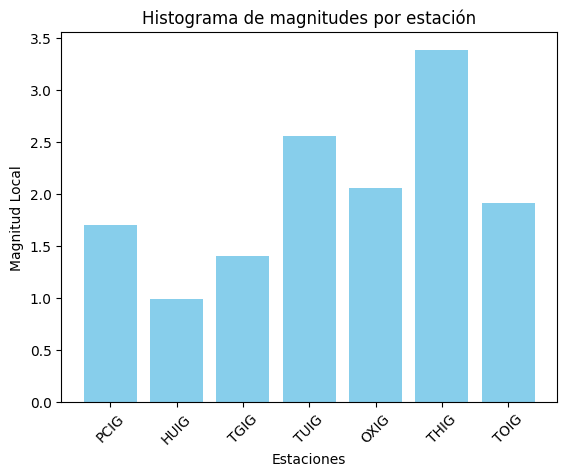

In [97]:
# Crear el histograma
plt.bar(Estaciones, Richter_R3, color='skyblue')

# Personalizar el gráfico
plt.title('Histograma de magnitudes por estación')
plt.xlabel('Estaciones')
plt.ylabel('Magnitud Local')
plt.xticks(rotation=45)  # Rotar los nombres de las estaciones para una mejor visualización

# Mostrar el histograma
plt.show()

¿Quieres eliminar estaciones? (sí/no): SI
¿Qué estación quieres eliminar?: THIG


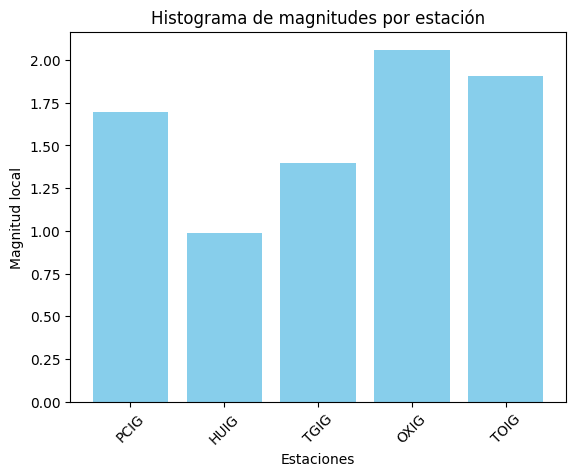

In [104]:
#Estaciones=["PCIG","HUIG","TGIG","TUIG","OXIG","THIG","TOIG"]
Estaciones=["PCIG","HUIG","TGIG","OXIG","THIG","TOIG"]
while True:
    respuesta = input("¿Quieres eliminar estaciones? (sí/no): ")
    if respuesta.lower() == 'sí' or respuesta.lower() == 'si':
        estacion=input('¿Qué estación quieres eliminar?: ')
        if estacion in Estaciones:
          # Eliminar la estación y sus valores correspondientes
          indice = Estaciones.index(estacion)
          del Estaciones[indice]
          del Richter_R3[indice]
          actualizar_histograma(Estaciones, Richter_R3)
        elif respuesta.lower() == 'no':
          print("La estación no se encuentra.")
        break  # Sale del ciclo while
    else:
        print("Respuesta no válida. Por favor, responde 'sí' o 'no'.")

#Sismo principal

In [53]:
Main=[]
Estaciones=["PCIG","TGIG","TUIG","OXIG","THIG","TOIG"]

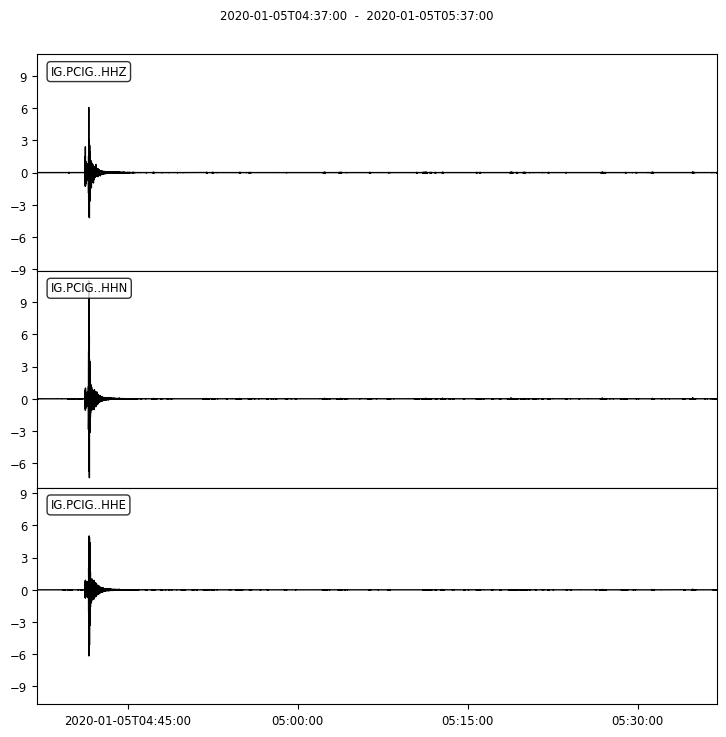

La amplitud máxima es:  6.0679526
La distancia entre estación y epicentro es:  160 km
La magnitud de Richter es:  4.386413334108479


In [54]:
pcig_wa=obspy.read('/content/Main_OPIS_EX/PCIG_HHE_WA.sac') #Se cargan las 3 componentes
pcig_wa+=obspy.read('/content/Main_OPIS_EX/PCIG_HHN_WA.sac')
pcig_wa+=obspy.read('/content/Main_OPIS_EX/PCIG_HHZ_WA.sac')

#Obtiene máximos:
PCIG_max=Maximos(pcig_wa)

#Distancia epicentro estación:
dR1_pcig=160

pcig_wa.plot()

Main.append(Richter(PCIG_max[2],dR1_pcig))

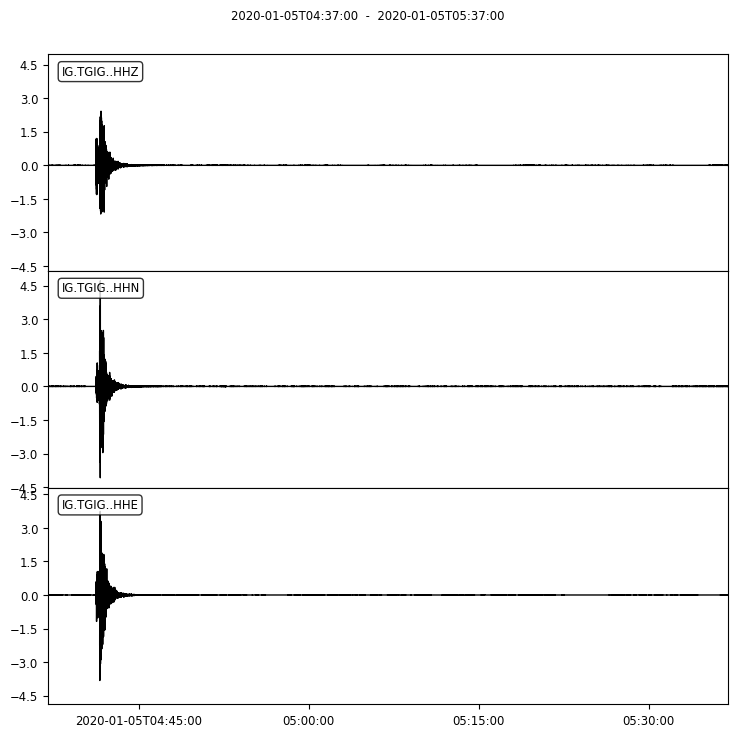

La amplitud máxima es:  2.4189503
La distancia entre estación y epicentro es:  166 km
La magnitud de Richter es:  4.031125271848627


In [55]:
tgig_wa=obspy.read('/content/Main_OPIS_EX/TGIG_HHE_WA.sac') #Se cargan las 3 componentes
tgig_wa+=obspy.read('/content/Main_OPIS_EX/TGIG_HHN_WA.sac')
tgig_wa+=obspy.read('/content/Main_OPIS_EX/TGIG_HHZ_WA.sac')

#Obtiene máximos:
TGIG_max=Maximos(tgig_wa)

#Distancia epicentro estación:
dR1_tgig=166

tgig_wa.plot()

Main.append(Richter(TGIG_max[2],dR1_tgig))

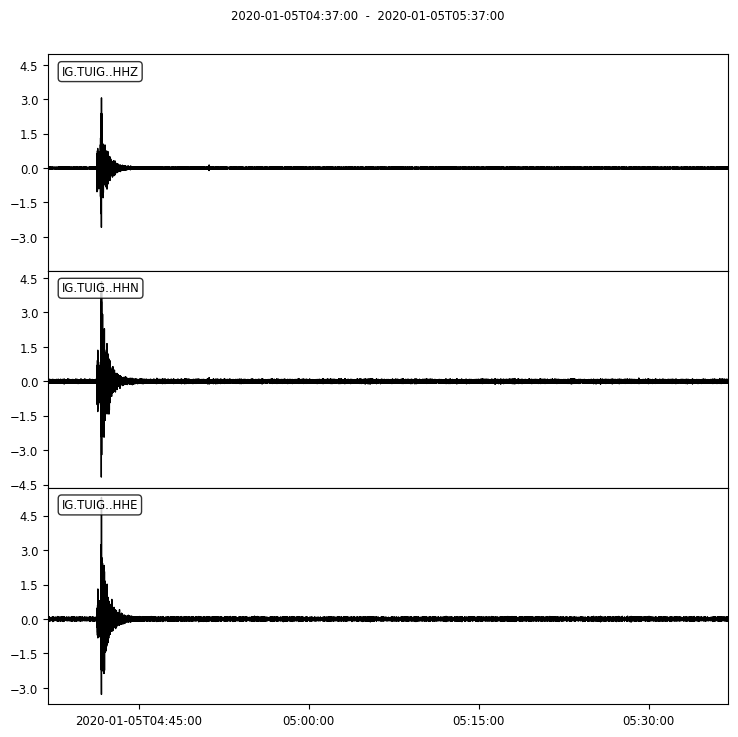

La amplitud máxima es:  3.0578082
La distancia entre estación y epicentro es:  200 km
La magnitud de Richter es:  4.3562530234165155


In [56]:
tuig_wa=obspy.read('/content/Main_OPIS_EX/TUIG_HHE_WA.sac') #Se cargan las 3 componentes
tuig_wa+=obspy.read('/content/Main_OPIS_EX/TUIG_HHN_WA.sac')
tuig_wa+=obspy.read('/content/Main_OPIS_EX/TUIG_HHZ_WA.sac')

#Obtiene máximos:
TUIG_max=Maximos(tuig_wa)

#Distancia epicentro estación:
dR1_tuig=200

tuig_wa.plot()

Main.append(Richter(TUIG_max[2],dR1_tuig))

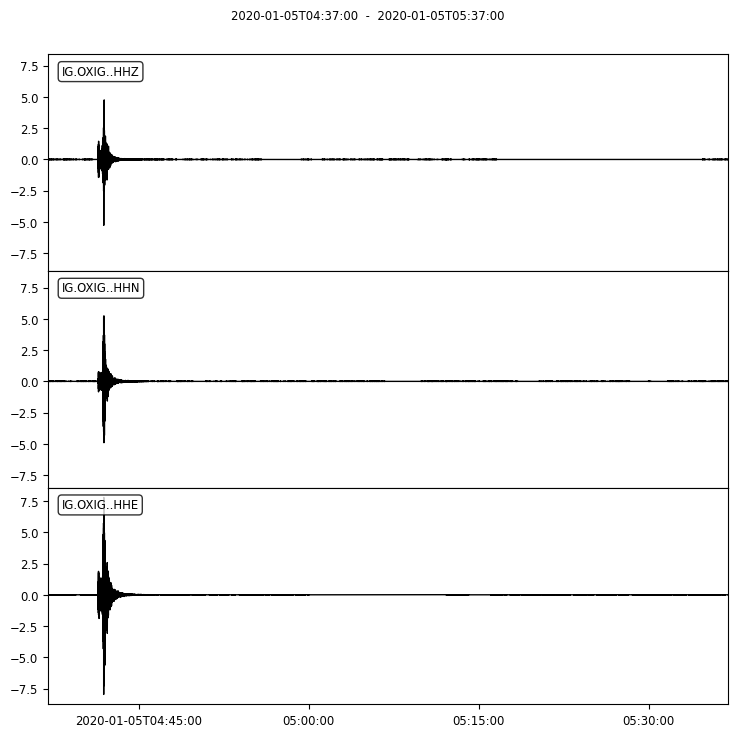

La amplitud máxima es:  5.261232
La distancia entre estación y epicentro es:  243 km
La magnitud de Richter es:  4.825360759743559


In [57]:
oxig_wa=obspy.read('/content/Main_OPIS_EX/OXIG_HHE_WA.sac') #Se cargan las 3 componentes
oxig_wa+=obspy.read('/content/Main_OPIS_EX/OXIG_HHN_WA.sac')
oxig_wa+=obspy.read('/content/Main_OPIS_EX/OXIG_HHZ_WA.sac')

#Obtiene máximos:
OXIG_max=Maximos(oxig_wa)

#Distancia epicentro estación:
dR1_oxig=243

oxig_wa.plot()

Main.append(Richter(OXIG_max[2],dR1_oxig))

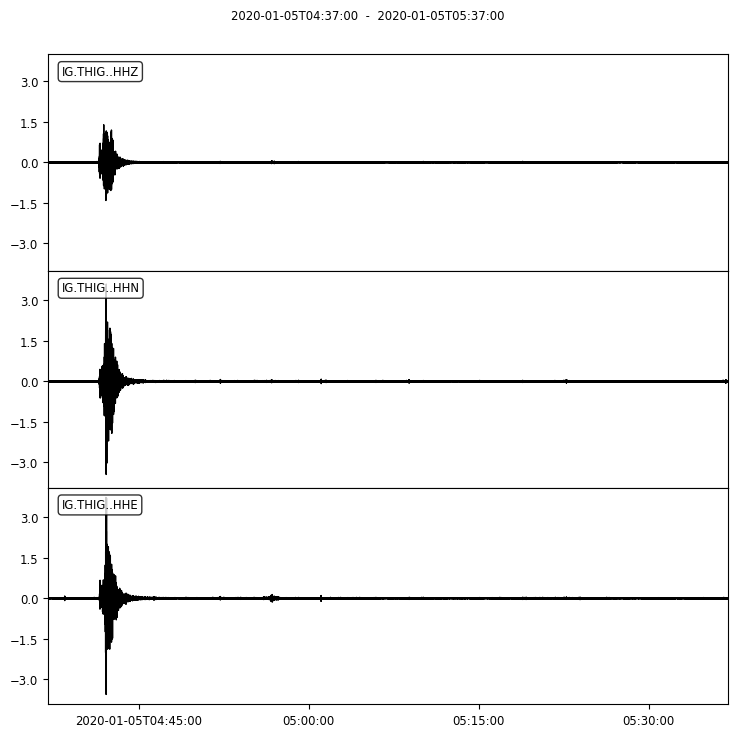

La amplitud máxima es:  1.4108807
La distancia entre estación y epicentro es:  240 km
La magnitud de Richter es:  4.238873315080275


In [58]:
thig_wa=obspy.read('/content/Main_OPIS_EX/THIG_HHE_WA.sac') #Se cargan las 3 componentes
thig_wa+=obspy.read('/content/Main_OPIS_EX/THIG_HHN_WA.sac')
thig_wa+=obspy.read('/content/Main_OPIS_EX/THIG_HHZ_WA.sac')

#Obtiene máximos:
THIG_max=Maximos(thig_wa)

#Distancia epicentro estación:
dR1_thig=240

thig_wa.plot()

Main.append(Richter(THIG_max[2],dR1_thig))

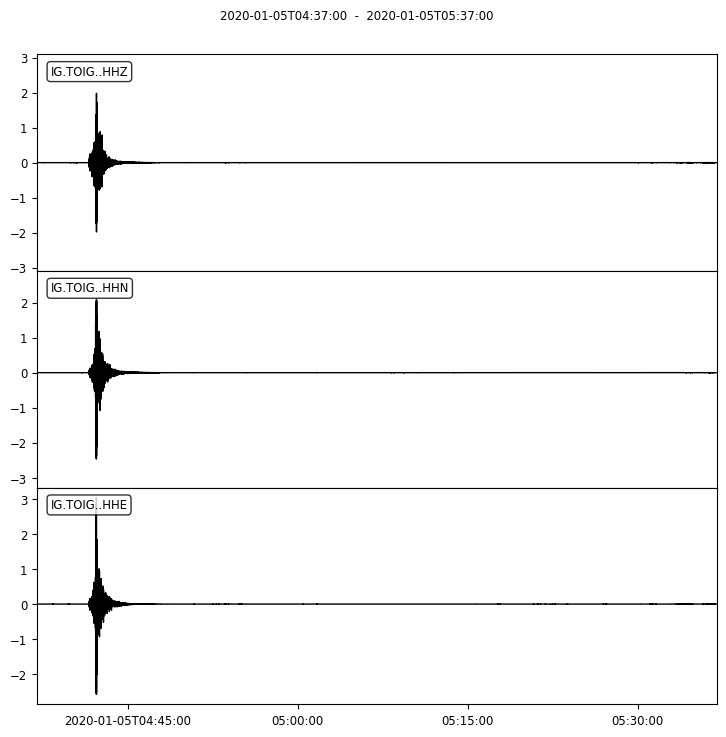

La amplitud máxima es:  1.9797413
La distancia entre estación y epicentro es:  332 km
La magnitud de Richter es:  4.774949561811221


In [59]:
toig_wa=obspy.read('/content/Main_OPIS_EX/TOIG_HHE_WA.sac') #Se cargan las 3 componentes
toig_wa+=obspy.read('/content/Main_OPIS_EX/TOIG_HHN_WA.sac')
toig_wa+=obspy.read('/content/Main_OPIS_EX/TOIG_HHZ_WA.sac')

#Obtiene máximos:
TOIG_max=Maximos(toig_wa)

#Distancia epicentro estación:
dR1_toig=332

toig_wa.plot()

Main.append(Richter(TOIG_max[2],dR1_toig))

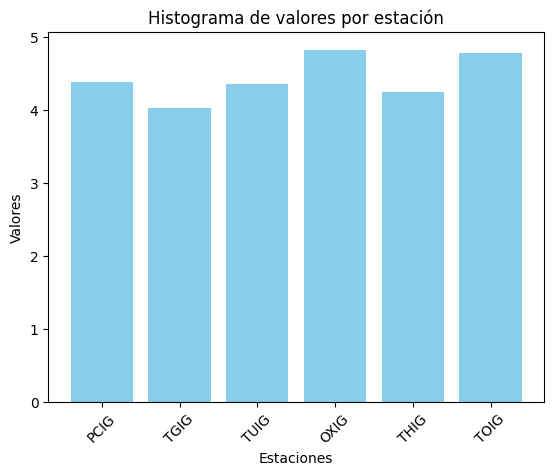

In [61]:
Estaciones=["PCIG","TGIG","TUIG","OXIG","THIG","TOIG"]
actualizar_histograma(Estaciones,Main)

In [ ]:
while True:
    respuesta = input("¿Quieres eliminar estaciones? (sí/no): ")
    if respuesta.lower() == 'sí' or respuesta.lower() == 'si':
        estacion=input('¿Qué estación quieres eliminar?: ')
        if estacion in Estaciones:
          # Eliminar la estación y sus valores correspondientes
          indice = Estaciones.index(estacion)
          del Estaciones[indice]
          del Richter_R3[indice]
          actualizar_histograma(Estaciones, Richter_R3)
        elif respuesta.lower() == 'no':
          print("La estación no se encuentra.")
        break  # Sale del ciclo while
    else:
        print("Respuesta no válida. Por favor, responde 'sí' o 'no'.")

#Ubicación de estaciones en SEISAN
Para esta sección, se convierten los datos de sac a formato SEISAN

In [67]:
# Leer archivo SAC
st = obspy.read('/content/R1_OPIS_EX/HUIG_HHZ_WA.sac')

# Escribir archivo SEISAN
obspy.write(st, "huig_seisan.mseed", format="MSEED")

AttributeError: module 'obspy' has no attribute 'write'